In [1]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials #These libraries are for reading files from drive

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id':'google drive link where you download the dataset'})#to download the train.csv file

In [0]:
download.GetContentFile('train.csv')

In [0]:
#Importing all the required libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

In [8]:
df = pd.read_csv("train.csv")

print("Number of data points:",df.shape[0])

Number of data points: 404290


In [0]:
df=df[:50000]#We are taking a subset of data as it will be difficult to build a model with entire data given limited computing power

In [10]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
id              50000 non-null int64
qid1            50000 non-null int64
qid2            50000 non-null int64
question1       50000 non-null object
question2       50000 non-null object
is_duplicate    50000 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.3+ MB


In [12]:
df.groupby("is_duplicate")['id'].count()#We are grouping ids based on the is_duplicate field and then using the count method

is_duplicate
0    31351
1    18649
Name: id, dtype: int64

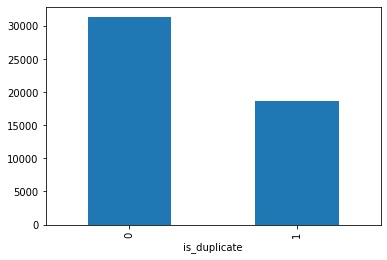

In [13]:
df.groupby("is_duplicate")['id'].count().plot.bar() #Majority of the question pairshave is duplicate as zero

In [14]:
print(df["is_duplicate"].value_counts())#value_counts majorly used for for finding percentages and number of points in each class
print(df["is_duplicate"].value_counts(normalize=True)) # We can see that 63 percent have 0 value

0    31351
1    18649
Name: is_duplicate, dtype: int64
0    0.62702
1    0.37298
Name: is_duplicate, dtype: float64


In [15]:
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [0]:
'''
question_hash={}
for question in df['qid1']:
  if question in question_hash:
    question_hash[question]+=1
  else:
    question_hash[question]=1
'''
#Can be used to count the number of questions but is  a slow method compared to inbuilt functions from numpy or pandas

In [0]:
'''
for question in df['qid2']:
  if question in question_hash:
    question_hash[question]+=1
  else:
    question_hash[question]=1
'''

In [0]:
'''print("Total number of unique questions "+str(len(question_hash)))
#Finding the number of questions which appear only once
res=0
for key in question_hash:
  if question_hash[key]==1:
    res+=1
print("Number of questions appearing once  "+str(res))
print("Number of questions that appear more than once "+str(len(question_hash)-res))'''

Total number of unique questions 88911
Number of questions appearing once  81515
Number of questions that appear more than once 7396


In [0]:
question_ids=df['qid1'].append(df['qid2'])

In [17]:
type(question_ids)

pandas.core.series.Series

In [18]:
unique_question_ids=len(np.unique(question_ids)) #Similar to an nd array we can use a python series object with np methods
print("Total number of unique questions "+str(unique_question_ids))

Total number of unique questions 88911


In [19]:
questions_repeated=np.sum(question_ids.value_counts()>1)
print("Total number of questions repeated "+str(questions_repeated))

Total number of questions repeated 7396


In [20]:
percentage_repeated=questions_repeated/unique_question_ids*100
print("Percentage of repeated questions "+str(percentage_repeated))

Percentage of repeated questions 8.318430790340903


In [21]:
print("Max number of times a question has repeated "+str(max(question_ids.value_counts())))

Max number of times a question has repeated 15


In [0]:
#dummy_df1=pd.DataFrame(df.groupby(['qid1','qid2']))

In [0]:
#dummy_df1.reset_index()

,index,0,1
0,0,"(1, 2)",id qid1 ... ...
1,1,"(3, 4)",id qid1 ... ...
2,2,"(4, 32881)",id ... is_duplicate 17296 17296 ...
3,3,"(5, 6)",id qid1 ... ...
4,4,"(7, 8)",id qid1 ... ...
...,...,...,...
49995,49995,"(88902, 88903)",id ... is_duplicate 49995 49995 ...
49996,49996,"(88904, 88905)",id qid1 ... ...
49997,49997,"(88906, 88907)",id ... is_duplicate 49997 49997 ...
49998,49998,"(88908, 88909)",id ... is_duplicate 49998 49998 ...


In [0]:
#dummy_df1.columns=dummy_df1.columns.astype(str)

In [0]:
#dummy_df1.head(5)

,0,1
0,"(1, 2)",id qid1 ... ...
1,"(3, 4)",id qid1 ... ...
2,"(4, 32881)",id ... is_duplicate 17296 17296 ...
3,"(5, 6)",id qid1 ... ...
4,"(7, 8)",id qid1 ... ...


In [0]:
#unique_pairs=len(np.unique(dummy_df1['0']))

In [0]:
#print(unique_pairs)

50000


In [0]:
#dummy_df1.columns

Index(['0', '1'], dtype='object')

In [22]:

pair_duplicates = df.groupby(['qid1','qid2']).count().reset_index() #pair_duplicates now has all the data points which has both unique qid1 and qid2

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])#gives us number of question pairs with same qid1 and qid2

Number of duplicate questions 0


Maximum number of times a single question is repeated: 15



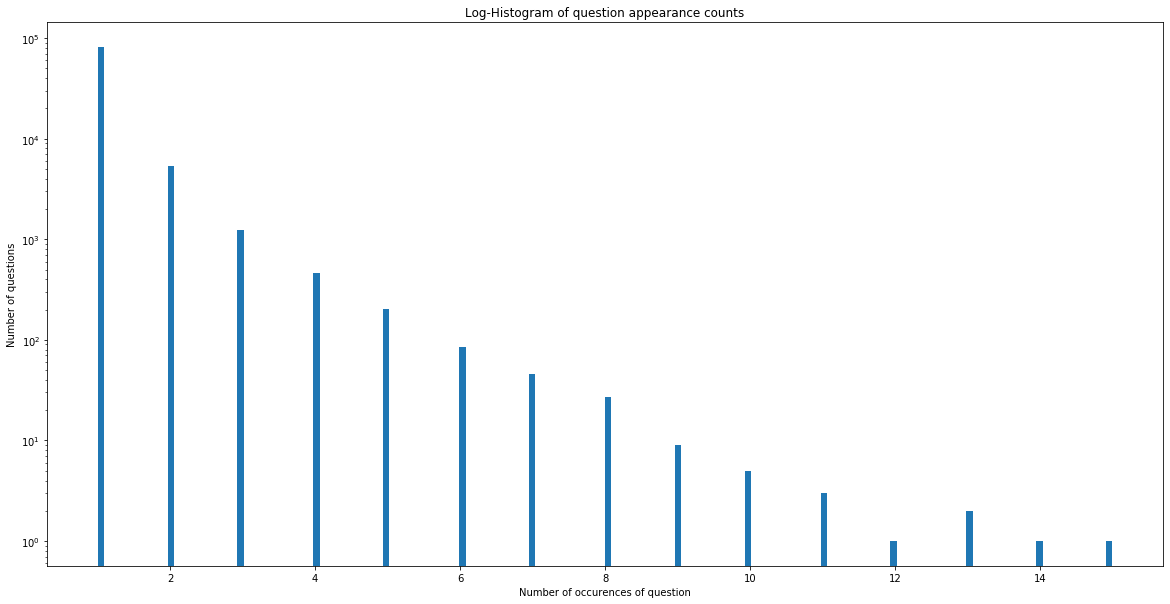

In [23]:
plt.figure(figsize=(20, 10))

plt.hist(question_ids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(question_ids.value_counts()))) 

#Y_Axis is logarthmic in nature

In [24]:
#preprocesing of the text
#Removing html tags
#Removing Punctuations
#Performing stemming
#Removing Stopwords
#Expanding contractions etc.
import nltk
nltk.download('stopwords')
STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x) #This helps us in removing all non-alpha numeric characters , simple example : https://ide.geeksforgeeks.org/TiYm8OxBoO
    
    
    if type(x) == type(''):
        x = porter.stem(x) # stemming using porter stemming
        example1 = BeautifulSoup(x)
        x = example1.get_text() # Removes all the Html tags
               
    
    return x


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
df['question1']=df['question1'].apply(preprocess)

In [0]:
df['question2']=df['question2'].apply(preprocess)

In [27]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0


In [28]:
'''
constructing few features like:(We can find these basic features in Kaggle winner solutions )

freq_qid1 = Frequency of qid1's
freq_qid2 = Frequency of qid2's
q1len = Length of q1
q2len = Length of q2
q1_n_words = Number of words in Question 1
q2_n_words = Number of words in Question 2
word_Common = (Number of common unique words in Question 1 and Question 2)
word_Total =(Total num of words in Question 1 + Total num of words in Question 2)
word_share = (word_common)/(word_Total)
freq_q1+freq_q2 = sum total of frequency of qid1 and qid2
freq_q1-freq_q2 = absolute difference of frequency of qid1 and qid2
'''

"\nconstructing few features like:(We can find these basic features in Kaggle winner solutions )\n\nfreq_qid1 = Frequency of qid1's\nfreq_qid2 = Frequency of qid2's\nq1len = Length of q1\nq2len = Length of q2\nq1_n_words = Number of words in Question 1\nq2_n_words = Number of words in Question 2\nword_Common = (Number of common unique words in Question 1 and Question 2)\nword_Total =(Total num of words in Question 1 + Total num of words in Question 2)\nword_share = (word_common)/(word_Total)\nfreq_q1+freq_q2 = sum total of frequency of qid1 and qid2\nfreq_q1-freq_q2 = absolute difference of frequency of qid1 and qid2\n"

In [0]:
df['freq_qid1']=df.groupby('qid1')['qid1'].transform('count')
#groupby creates a groupby object which groups based on qids and we can find qids by using count of qids

In [30]:
df['freq_qid1'].value_counts()
#Thismight have some affect on our output may be questions that appear more frequently belong to a particular class

1     43019
2      4590
3      1341
4       504
5       280
6       120
7        91
8        24
12       12
10       10
9         9
Name: freq_qid1, dtype: int64

In [31]:
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
df['freq_qid2'].value_counts()
#maximum number of times a question with a particular value of qid2 appeared is 13
#15 the max number of times a question appeared must have been appeared some times in qid1 and sometimes in qid2

1     43126
2      4218
3      1356
4       632
5       315
6       156
7        63
11       44
8        40
9        27
13       13
10       10
Name: freq_qid2, dtype: int64

In [0]:
#Basic Fature Extraction

In [0]:
df['q1len'] = df['question1'].str.len()#series object str() functions allows us to use several methods on the series object
df['q2len'] = df['question2'].str.len()
df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))#row.split() returns a list of words which are split based on space
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
#pandas apply method takes each series row at a time and we can apply any function on it

In [0]:
def normalized_word_Common(row): #For Word_common feature
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
  return 1.0 * len(w1 & w2)
df['word_Common'] = df.apply(normalized_word_Common, axis=1)#axis==1 says apply operation row wise

In [0]:
def normalized_word_Total(row):#for word total features
  w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return 1.0*(len(w1)+len(w2))
df['word_Total']=df.apply(normalized_word_Total,axis=1)

In [0]:
def normalized_word_share(row): #for word share Feature
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
  return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

In [0]:
df['word_share'] = df.apply(normalized_word_share, axis=1)

df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

In [39]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,15,13,12.0,25.0,0.480000,2,0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,88,13,18,8.0,26.0,0.307692,2,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,15,11,5.0,26.0,0.192308,2,0
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,13,19,1.0,22.0,0.045455,2,0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,1,1,76,39,16,8,5.0,22.0,0.227273,2,0


In [0]:
#A function to prevent violin plots
def violin_distri(column_name):
  plt.figure(figsize=(12, 8))
  plt.subplot(1,2,1)
  sns.violinplot(x = 'is_duplicate', y = column_name, data = df[0:])
  plt.subplot(1,2,2)
  sns.distplot(df[df['is_duplicate'] == 1.0][column_name][0:] , label = "1", color = 'red')
  sns.distplot(df[df['is_duplicate'] == 0.0][column_name][0:] , label = "0" , color = 'blue' )
  plt.show()

In [41]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

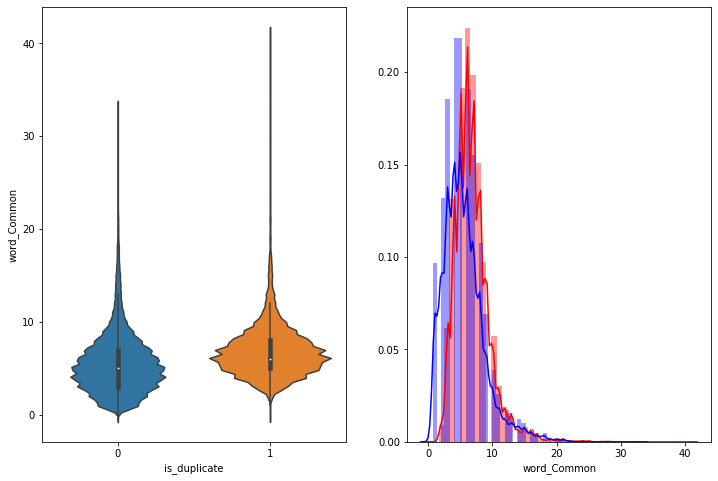

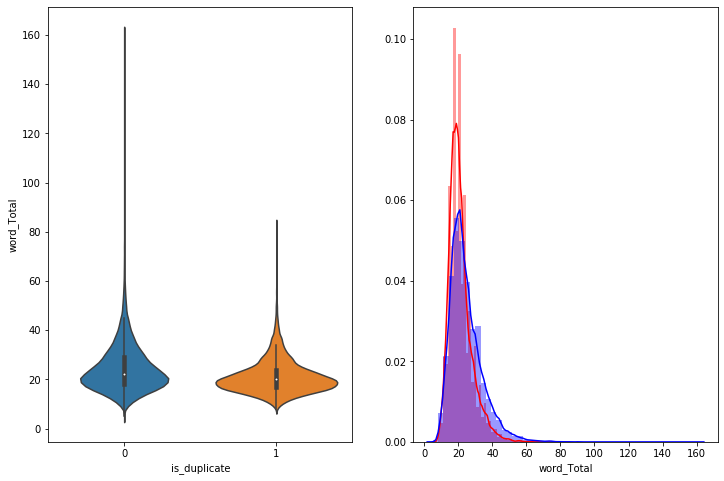

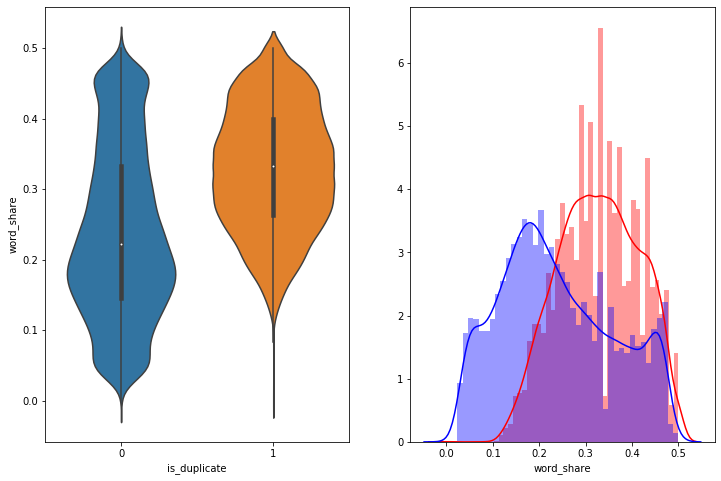

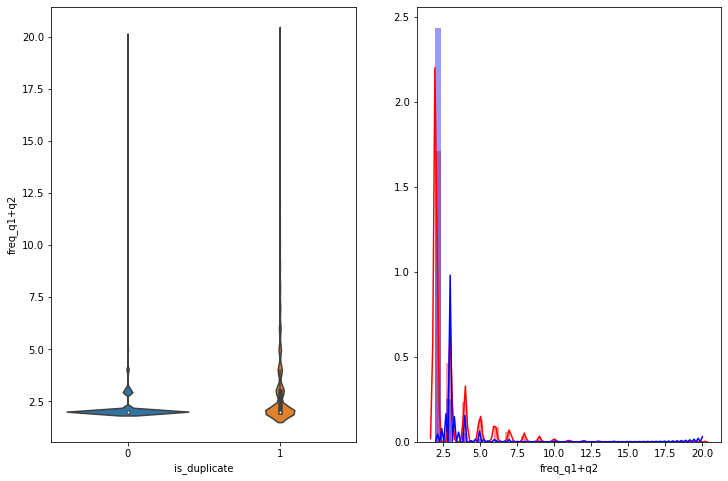

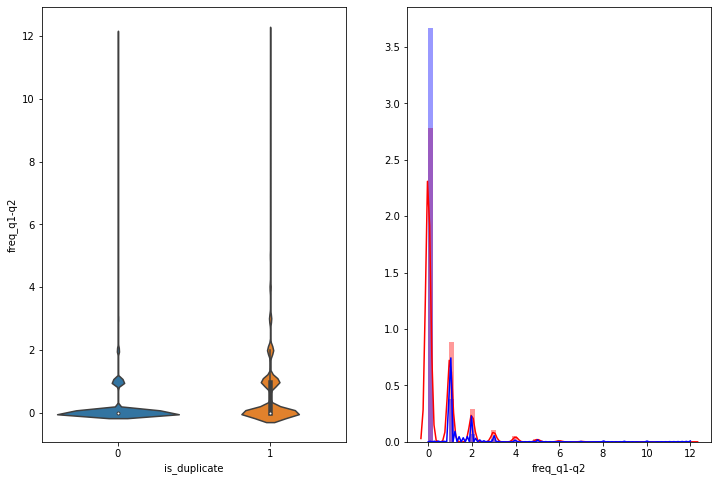

In [42]:
#plotting violin plots for all other features
column_list=['word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2']
for column_name in column_list:
  violin_distri(column_name)
  
#Word_share is the best and word_common is the next best at seperating the classes

In [0]:
#Out of all the features word share looks like the most useful feature

In [0]:
'''
Features: Taken from Kaggle winner solutions and Applied AI Course

cwc_min : Ratio of common_word_count to min lenghth of word count of Q1 and Q2
cwc_min = common_word_count / (min(len(q1_words), len(q2_words))



cwc_max : Ratio of common_word_count to max lenghth of word count of Q1 and Q2
cwc_max = common_word_count / (max(len(q1_words), len(q2_words))



csc_min : Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2
csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))



csc_max : Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2
csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))



ctc_min : Ratio of common_token_count to min lenghth of token count of Q1 and Q2
ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))



ctc_max : Ratio of common_token_count to max lenghth of token count of Q1 and Q2
ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))



last_word_eq : Check if last word of both questions is equal or not
last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])



first_word_eq : Check if First word of both questions is equal or not
first_word_eq = int(q1_tokens[0] == q2_tokens[0])



abs_len_diff : Abs. length difference
abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))



mean_len : Average Token Length of both Questions
mean_len = (len(q1_tokens) + len(q2_tokens))/2



fuzz_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/



fuzz_partial_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/



token_sort_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

token_set_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

longest_substr_ratio : Ratio of length longest common substring to min lenghth of token count of Q1 and Q2
longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))
'''

In [43]:
!pip install fuzzywuzzy

In [44]:
!pip install Distance

     |████████████████████████████████| 184kB 1.4MB/s 
  Created wheel for Distance: filename=Distance-0.1.3-cp36-none-any.whl size=16261 sha256=ea8985f6cc3fceaea4710456c50e782e52eda63be51aa37a952080964e230606
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built Distance


In [45]:
import distance
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



In [0]:
SAFE_DIV=0.0001
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [0]:
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")[:50000]
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

In [47]:
df = extract_features(df)

token features...
fuzzy features..


In [0]:
df_features=df # Just to store the dataframe 

In [48]:
#for plotting word clouds we are f
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()#this will create pairs of questions and will be converted into a single array using flatten
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 37298
Number of data points in class 0 (non duplicate pairs) : 62702


In [49]:
#other method to remove stopwords is to go to each row and column pair and apply the stopword removal this is efficient method
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
stopwords.remove("like")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 2011234
Total number of words in non duplicate pair questions : 4080892


Word Cloud for Duplicate Question pairs


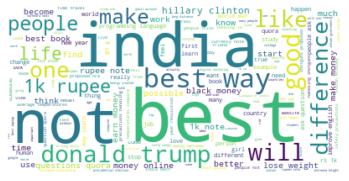

In [50]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non-Duplicate Question pairs:


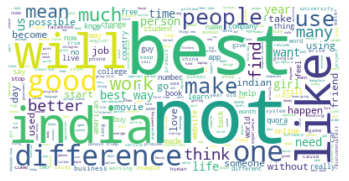

In [51]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,15,13,12.0,25.0,0.480000,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,88,13,18,8.0,26.0,0.307692,2,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,15,11,5.0,26.0,0.192308,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,13,19,1.0,22.0,0.045455,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,1,1,76,39,16,8,5.0,22.0,0.227273,2,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


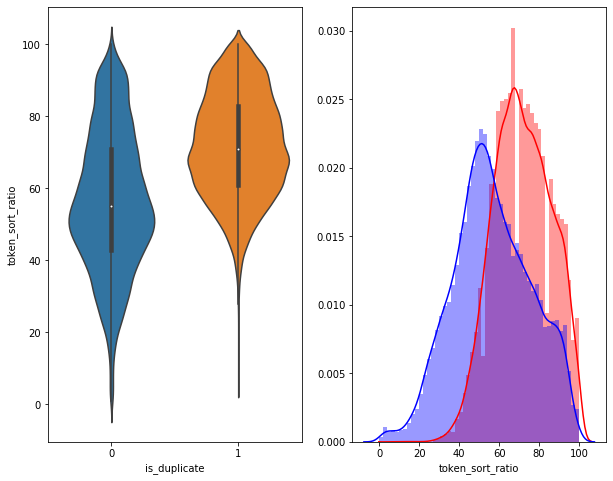

In [53]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

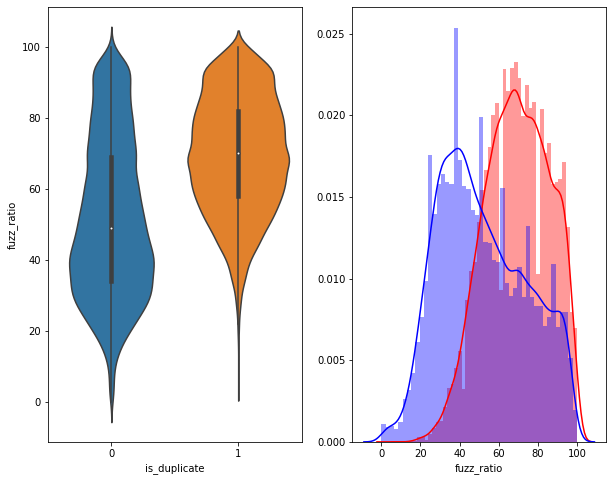

In [54]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

In [0]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [0]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

In [0]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [0]:
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

In [57]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,15,13,12.0,25.0,0.480000,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,88,13,18,8.0,26.0,0.307692,2,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,15,11,5.0,26.0,0.192308,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,13,19,1.0,22.0,0.045455,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,1,1,76,39,16,8,5.0,22.0,0.227273,2,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [0]:
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(df["question1"])+list(df["question2"])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [0]:
#tfidf.get_feature_names()

In [61]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,15,13,12.0,25.0,0.480000,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,88,13,18,8.0,26.0,0.307692,2,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,15,11,5.0,26.0,0.192308,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,13,19,1.0,22.0,0.045455,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,1,1,76,39,16,8,5.0,22.0,0.227273,2,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [62]:
from tqdm import tqdm
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(df['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([1,96])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['q1_feats_m'] = list(vecs1)


100%|██████████| 50000/50000 [08:13<00:00, 101.34it/s]


In [0]:
#from tqdm import tqdm
#nlp = spacy.load('en_core_web_sm')

In [0]:
#vecs1=[]
#data=["hi hello how are you","I am fine how about you"]
#df_v=pd.DataFrame(data,columns=['strings'])

In [0]:
'''
for string in df_v['strings']:
  doc1=nlp(string)
  mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
  for word1 in doc1:
    vec1=word1.vector
'''    

In [63]:
vecs2 = []
for qu2 in tqdm(list(df['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([1,96])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df['q2_feats_m'] = list(vecs2)

100%|██████████| 50000/50000 [08:24<00:00, 106.13it/s]


In [64]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,q1_feats_m,q2_feats_m
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,15,13,12.0,25.0,0.480000,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,"[182.61383867263794, -136.56293028593063, -56....","[146.79116249084473, -122.60082072019577, -29...."
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,88,13,18,8.0,26.0,0.307692,2,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,"[80.71999859809875, -126.074702732265, -11.375...","[132.92140102386475, -56.09579515457153, -26.6..."
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,15,11,5.0,26.0,0.192308,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667,"[76.43090653419495, -119.91277157561854, 6.833...","[-54.29364025592804, -5.248118877410889, -99.5..."
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,13,19,1.0,22.0,0.045455,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216,"[-104.75663542747498, -36.701176047325134, -75...","[76.92743706703186, -123.92263174057007, -165...."
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,1,1,76,39,16,8,5.0,22.0,0.227273,2,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000,"[258.581803381443, -181.08687761425972, -57.60...","[107.52381682395935, -60.51584327220917, 36.60..."


In [0]:
df_final_q1 = pd.DataFrame(df.q1_feats_m.values.tolist(), index= df.index)
df_final_q2= pd.DataFrame(df.q2_feats_m.values.tolist(), index= df.index)

In [0]:
df_after_w2vec=df

In [67]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,q1_feats_m,q2_feats_m
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,15,13,12.0,25.0,0.480000,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,"[182.61383867263794, -136.56293028593063, -56....","[146.79116249084473, -122.60082072019577, -29...."
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,88,13,18,8.0,26.0,0.307692,2,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,"[80.71999859809875, -126.074702732265, -11.375...","[132.92140102386475, -56.09579515457153, -26.6..."
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,15,11,5.0,26.0,0.192308,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667,"[76.43090653419495, -119.91277157561854, 6.833...","[-54.29364025592804, -5.248118877410889, -99.5..."
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,13,19,1.0,22.0,0.045455,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216,"[-104.75663542747498, -36.701176047325134, -75...","[76.92743706703186, -123.92263174057007, -165...."
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,1,1,76,39,16,8,5.0,22.0,0.227273,2,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000,"[258.581803381443, -181.08687761425972, -57.60...","[107.52381682395935, -60.51584327220917, 36.60..."


In [0]:
df_final_q1['id']=df['id']
df_final_q2['id']=df['id']
df2  = df_final_q1.merge(df_final_q2, on='id',how='left')
result  = df.merge(df2, on='id',how='left')
result.to_csv('final_features.csv')

In [0]:
df_mod=pd.read_csv("final_features.csv")

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [0]:
df_mod=pd.read_csv("final_features.csv")

In [0]:
df_mod=df_mod.drop(["q1_feats_m","q2_feats_m"],axis=1)#to remove the array of mean vectors

In [74]:
df_mod.shape

(50000, 225)

In [75]:
df_mod.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,0_x,1_x,2_x,3_x,4_x,5_x,6_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,15,13,12.0,25.0,0.480000,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,182.613839,-136.562930,-56.694057,-152.694411,-88.171369,4.604392,135.210805,...,65.412098,-7.539252,-27.068243,195.377211,-41.101956,-141.384354,163.830704,-48.883981,31.668111,39.509010,-72.089956,69.113761,-81.958432,163.829734,34.160496,-19.093811,66.028681,93.160896,119.312162,201.731555,-3.819052,80.728079,-129.988191,-83.666621,-32.682747,-79.908203,-159.880914,53.648479,-9.254887,-61.817819,34.566014,-100.282137,128.618587,41.928756,-5.991927,7.952249,-58.008032,-10.065457,-105.209200,63.163124
1,1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,88,13,18,8.0,26.0,0.307692,2,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,80.719999,-126.074703,-11.375685,-59.227738,-113.709396,-45.024375,13.478575,...,107.788797,-29.429406,-98.434502,102.540590,-176.465672,119.866175,172.531122,95.736929,-30.359718,109.098372,3.051552,-46.950727,-20.358194,36.254787,100.393853,-148.789356,-65.608946,202.694174,86.773424,-14.930102,-95.314988,-69.315761,-135.227212,-95.724568,-8.655722,-145.088589,-161.280046,123.446005,-68.158322,-66.726898,131.205256,-25.868247,107.495054,127.370422,10.582126,-28.091367,-64.362854,3.686725,-18.111265,93.103318
2,2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,15,11,5.0,26.0,0.192308,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667,76.430907,-119.912772,6.833456,-106.042330,-82.130984,31.335543,131.154069,...,-12.572621,10.800810,-149.141311,128.621763,-39.351293,2.203678,43.716717,-94.131327,-72.906512,-6.602932,38.199202,112.540854,-144.197192,114.410016,-16.276459,-48.687198,-17.423907,121.175698,5.816028,172.359640,5.679146,-33.975037,4.363616,-11.679935,-51.823001,-97.709359,-138.045920,84.612162,14.791682,-84.091129,137.266964,-50.611496,58.506562,111.666839,-64.378609,59.135203,49.835126,-16.878549,-67.099539,49.229134
3,3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,13,19,1.0,22.0,0.045455,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216,-104.756635,-36.701176,-75.603356,-149.664152,-105.457528,69.082201,-50.771649,...,-62.344905,75.960494,-172.564255,0.822267,-62.815546,-171.703526,55.519284,-101.141645,-81.888030,37.657591,75.713234,63.178591,-73.420770,-51.624461,234.200020,-70.197558,174.635885,89.652216,-81.437837,20.241856,-49.969040,-126.453656,-5.707089,-81.314920,5.204102,-125.264111,-227.642958,21.101677,7.081480,-47.085433,52.555484,-143.318992,96.776476,-63.738446,48.406192,-68.692261,19.499955,-66.713476,-62.215934,105.004267
4,4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,1,1,76,39,16,8,5.0,22.0,0.227273,2,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000,258.581803,-181.086878,-57.605598,-255.631386,-180.068656,70.342247,166.152328,...,8.188571,-16.836623,45.606025,94.867044,-104.477364,-78.006761,75.656340,-14.431851,-17.307542,34.854528,

In [0]:
df_mod=df_mod.iloc[1:]
y_mod = df_mod['is_duplicate']
df_mod.drop(['Unnamed: 0', 'id','is_duplicate','question1','question2'], axis=1, inplace=True) # we can drop unnecessary columns

In [77]:
df_mod.head(5)

,qid1,qid2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
1,3,4,1,1,51,88,13,18,8.0,26.0,0.307692,2,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,80.719999,-126.074703,-11.375685,-59.227738,-113.709396,-45.024375,13.478575,20.875366,-38.146633,69.135435,-66.572334,90.554363,...,107.788797,-29.429406,-98.434502,102.540590,-176.465672,119.866175,172.531122,95.736929,-30.359718,109.098372,3.051552,-46.950727,-20.358194,36.254787,100.393853,-148.789356,-65.608946,202.694174,86.773424,-14.930102,-95.314988,-69.315761,-135.227212,-95.724568,-8.655722,-145.088589,-161.280046,123.446005,-68.158322,-66.726898,131.205256,-25.868247,107.495054,127.370422,10.582126,-28.091367,-64.362854,3.686725,-18.111265,93.103318
2,5,6,1,1,73,59,15,11,5.0,26.0,0.192308,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667,76.430907,-119.912772,6.833456,-106.042330,-82.130984,31.335543,131.154069,6.716182,-83.897960,28.067121,-43.134887,-20.481063,...,-12.572621,10.800810,-149.141311,128.621763,-39.351293,2.203678,43.716717,-94.131327,-72.906512,-6.602932,38.199202,112.540854,-144.197192,114.410016,-16.276459,-48.687198,-17.423907,121.175698,5.816028,172.359640,5.679146,-33.975037,4.363616,-11.679935,-51.823001,-97.709359,-138.045920,84.612162,14.791682,-84.091129,137.266964,-50.611496,58.506562,111.666839,-64.378609,59.135203,49.835126,-16.878549,-67.099539,49.229134
3,7,8,1,1,50,65,13,19,1.0,22.0,0.045455,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216,-104.756635,-36.701176,-75.603356,-149.664152,-105.457528,69.082201,-50.771649,70.036471,55.767645,60.976766,-55.219800,-2.213940,...,-62.344905,75.960494,-172.564255,0.822267,-62.815546,-171.703526,55.519284,-101.141645,-81.888030,37.657591,75.713234,63.178591,-73.420770,-51.624461,234.200020,-70.197558,174.635885,89.652216,-81.437837,20.241856,-49.969040,-126.453656,-5.707089,-81.314920,5.204102,-125.264111,-227.642958,21.101677,7.081480,-47.085433,52.555484,-143.318992,96.776476,-63.738446,48.406192,-68.692261,19.499955,-66.713476,-62.215934,105.004267
4,9,10,1,1,76,39,16,8,5.0,22.0,0.227273,2,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000,258.581803,-181.086878,-57.605598,-255.631386,-180.068656,70.342247,166.152328,-52.712085,-117.481528,125.033823,-39.016226,39.909560,...,8.188571,-16.836623,45.606025,94.867044,-104.477364,-78.006761,75.656340,-14.431851,-17.307542,34.854528,-74.620122,37.035642,-56.097163,58.765203,51.088502,-32.862380,12.413910,84.693837,86.748802,34.948198,-27.423027,-48.966940,-107.960824,-9.733609,-13.223462,-77.255372,-32.733086,125.321789,-32.986085,-43.419014,17.457831,-59.596117,108.536411,35.886022,1.499496,-16.594398,39.695055,-33.766444,-57.326928,0.538023
5,11,12,1,1,86,91,21,21,13.0,34.0,0.382353,2,0,0.666656,0.571420,0.888879,0.799992,0.705878,0.705878,1.0,0.0,0.0,17.0,81,77,73,73,0.160920,162.637692,-139.595026,63.671957,-143.378900,-131.773496,-110.083091,170.897738,63.248962,-98.263739,57.312748,-38.362692,-0.664811,...,50.429139,-2.983936,-213.917062,1.716364,-139.259060,-10.326214,84.056291,-44.263011,-9.758290,107.337685,75.181068,-35.931220,-91.759016,50.732455,82.594270,-68.195270,103.121429,193.663651,164.646231,51.466897,1.385854,136.488889,-79.598725,-77.233449,-89.977118,-171.836299,-68.779610,110.709301,23.209913,-3.669581,216.149519,-31.364384,130.878821,-1.563317,33.622035,45.180304

In [0]:
df_mod.drop(['qid1','qid2'],axis=1,inplace=True)#qid1 and qid 2 also need to be dropped as they add unncecessary ordering

In [0]:
X_train,X_test, y_train, y_test = train_test_split(df_mod, y_mod, stratify=y_mod, test_size=0.2)
#stratify makes sure that the splits always have same ratio of different classes of the output variable

In [80]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (39999, 218)
Number of data points in test data : (10000, 218)


In [0]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [82]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)



---------- Distribution of output variable in train data ----------
Class 0:  0.6270156753918849 Class 1:  0.3729843246081152
---------- Distribution of output variable in train data ----------
Class 0:  0.373 Class 1:  0.373


Log loss on Test Data using Random Model 0.8564815254954996


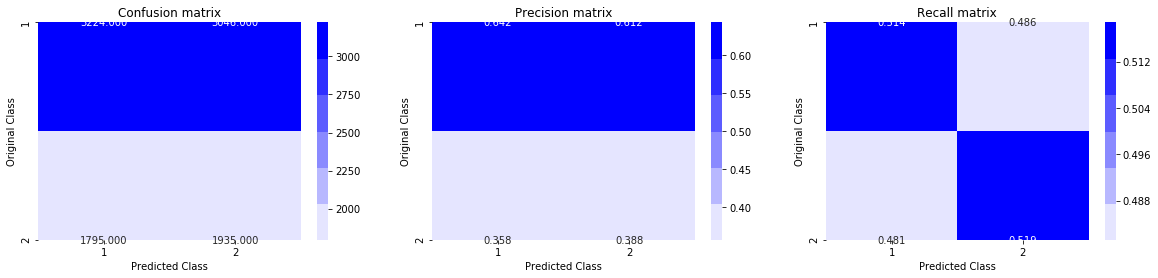

In [83]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [0]:
X_train

,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
8577,1,1,92,127,17,21,7.0,37.0,0.189189,2,0,0.428565,0.230767,0.624992,0.624992,0.470585,0.380951,0.0,0.0,4.0,19.0,68,52,19,39,0.204301,229.047534,22.106781,168.823449,-163.379285,-115.449133,42.328336,95.379177,-57.602443,-19.525515,30.509278,-128.190019,-2.280977,-71.674635,-67.405498,...,-9.639634,17.832845,-123.956707,176.208461,-94.412981,37.734528,101.066960,-134.265589,18.397871,261.156699,-81.975888,159.070325,-77.725593,17.863875,-46.755411,-206.530096,-160.386888,169.028445,57.520485,76.209983,41.023015,-56.810159,-15.440710,167.122596,15.164266,-204.479602,-116.748966,71.536975,-56.083941,-119.247418,139.124251,-68.367929,34.120854,53.746501,-19.709643,-190.994867,145.463344,98.107446,-93.269160,-48.923077
550,1,1,38,45,6,8,3.0,14.0,0.214286,2,0,0.666644,0.499988,0.666644,0.499988,0.666656,0.499994,0.0,1.0,2.0,7.0,70,67,64,71,0.333333,-15.555073,-28.556665,-47.033262,-31.146713,-4.028571,72.871974,126.953071,67.059777,-26.149630,27.116214,35.479755,50.092584,-8.370598,-13.803455,...,-69.997068,51.500905,1.455042,23.399757,-25.035302,23.871040,56.721527,-32.641340,6.872497,94.616640,-18.763332,29.648154,-47.599022,-28.496444,-32.329004,-2.536280,64.103000,24.678172,19.357307,-12.687012,68.999564,-63.823681,-62.650443,-46.340891,-48.758466,-53.304615,-78.683431,55.336261,30.631671,-32.007322,-16.508497,-6.050615,8.444191,13.619152,1.594218,-8.048191,-17.096737,17.387759,-39.230463,-19.169018
14357,1,1,39,38,7,7,6.0,14.0,0.428571,2,0,0.999975,0.999975,0.666644,0.666644,0.857131,0.857131,1.0,1.0,0.0,7.0,94,93,93,92,0.692308,20.876205,62.737635,-63.861939,-31.548383,-61.950857,25.677918,55.631884,25.710018,-20.043012,13.595838,0.213831,-1.648119,33.336384,12.112271,...,20.480747,26.711931,-50.636361,58.310559,1.298387,16.561339,8.121384,-8.044226,24.266928,51.047881,-3.902943,-1.516913,-46.516713,-20.493190,-41.171470,-17.137461,-29.635750,51.142138,3.487236,64.229997,-13.616434,-37.311346,-49.786396,16.435468,-12.914787,-26.168017,-77.148941,62.555564,38.051033,-18.068591,29.164294,3.564397,57.296694,38.259683,-28.004309,-22.980768,44.936005,-18.083056,-63.000809,13.877542
33914,1,1,36,31,7,6,6.0,13.0,0.461538,2,0,0.999967,0.999967,0.999967,0.749981,0.999983,0.857131,1.0,1.0,1.0,6.5,100,92,92,94,0.843750,20.716526,35.423626,-35.096670,-62.179112,-49.968647,51.069278,-2.534303,-59.572398,21.499552,26.151908,17.874582,-25.955318,0.147847,-15.658339,...,1.650428,-10.003887,8.248240,68.800249,-14.680570,-6.821993,34.640556,-8.290838,20.827535,-6.984103,-16.930012,10.417768,7.831218,6.360924,7.892844,-19.147528,-45.167799,51.731664,-22.582664,11.556121,-52.461411,-27.875922,-0.802512,72.729477,39.967902,-10.797565,-47.195206,15.337369,-44.424047,-6.609961,26.204886,-36.430641,46.379042,9.828875,41.512737,26.676275,35.679238,24.845370,14.247619,15.113576
1300,1,1,53,54,12,12,11.0,24.0,0.458333,2,0,0.999975,0.799984,0.999986,0.874989,0.916659,0.916659,1.0,1.0,0.0,12.0,96,91,95,94,0.611111,28.202660,-86.303106,-23.247490,-118.327927,-64.843019,49.813513,79.325086,29.593145,-5.565078,89.897912,7.492593,67.919482,-113.941451,-120.814614,...,89.645270,62.608570,-81.488072,85.299532,-45.008412,-43.848500,-12.000486,-42.587308,-44.216887,-4.381124,21.599438,9.837404,-83.931763,42.725591,19.260491,13.790422,35.612177,104.183163,75.395435,102.705641,13.699197,18.898657,28.451792,-28.503924,-16.212110,-60.447345,-60.656687,29.451282,35.362622,-50.533695,59.788781,-58.951528,4.512571,-12.257

For values of alpha =  1e-05 The log loss is: 0.6605330475024989
For values of alpha =  0.0001 The log loss is: 0.5335805186637488
For values of alpha =  0.001 The log loss is: 0.5354042782241867
For values of alpha =  0.01 The log loss is: 0.529693896690012
For values of alpha =  0.1 The log loss is: 0.519997011871381
For values of alpha =  1 The log loss is: 0.5355797979034388
For values of alpha =  10 The log loss is: 0.5547690369512228


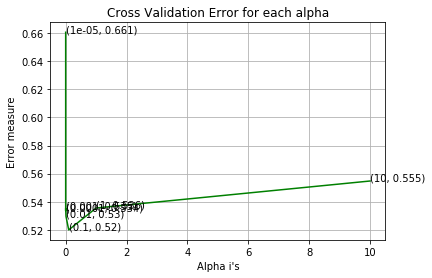

For values of best alpha =  0.1 The train log loss is: 0.5192448343516357
For values of best alpha =  0.1 The test log loss is: 0.519997011871381
Total number of data points : 10000


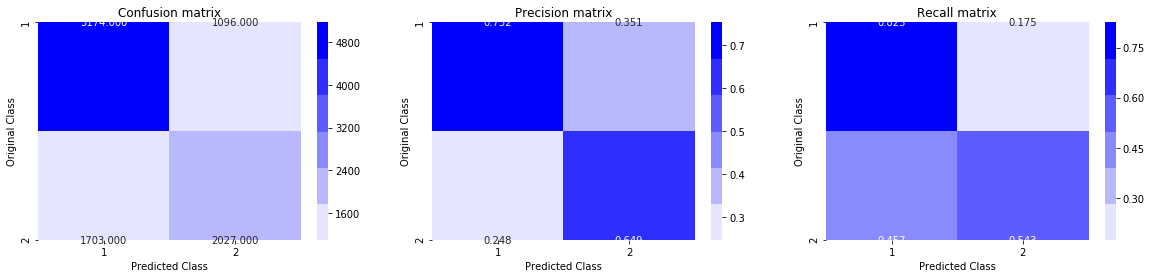

In [84]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)#Selecting loss as log gives us a Logistic Regression/Hinge SVM
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [85]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.686028	valid-logloss:0.686265
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.627338	valid-logloss:0.628889
[20]	train-logloss:0.585049	valid-logloss:0.587824
[30]	train-logloss:0.553711	valid-logloss:0.557257
[40]	train-logloss:0.529698	valid-logloss:0.534369
[50]	train-logloss:0.510921	valid-logloss:0.516609
[60]	train-logloss:0.495942	valid-logloss:0.502619
[70]	train-logloss:0.483886	valid-logloss:0.491369
[80]	train-logloss:0.474339	valid-logloss:0.482632
[90]	train-logloss:0.466482	valid-logloss:0.475448
[100]	train-logloss:0.459783	valid-logloss:0.469553
[110]	train-logloss:0.454045	valid-logloss:0.46448
[120]	train-logloss:0.449223	valid-logloss:0.460331
[130]	train-logloss:0.445037	valid-logloss:0.45667
[140]	train-logloss:0.441597	valid-logloss:0.453693
[150]	train-logloss:0.438486	valid-logloss:0.45109
[160]	train-logloss:0.435618	va

Total number of data points : 10000


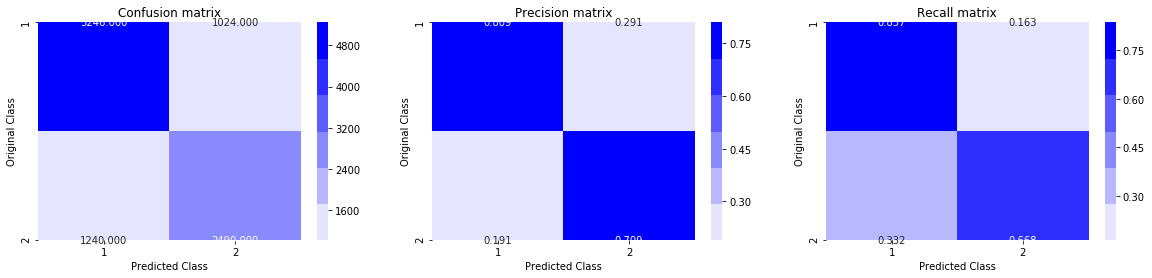

In [86]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)